In [171]:
import numpy as np
import matplotlib.pyplot as plt

#CONSTANTES

#Nombre d'Avogadro
avo=6.02214076e23

#Constante de Boltzmann
k=1.38064852e-23 #m2 kg s-2 K-1 ou J/K
T=298.13
kT=k*T #énergie thermique par molécule
RGP=k*avo

#Charge de l'électron
e=1.602e-19
F=e*avo

#Permittivité électrique de l'eau
eps=8.85418782e-12*78.5 #m-3 kg-1 s4 A2

#Viscosité (dynamique) de l'eau à 20°C
mu=1e-3 #Pa.s

# 1 Flux électro-osmotique dans une membrane d’électrodialyse
Des membranes d’électrodialyse d’une épaisseur de 500 m ayant un potentiel de surface de -60 mV sont utilisées dans un stack d’ED avec un champ électrique de 700 V/m. Le rayon des pores de la membrane est de 0,1 m en moyenne. La porosité de surface est de 10 %.

1)	Calculer le débit électro-osmotique à travers une membrane de 20 cm de long et 20 cm de large.

>Si on considère que la longueur de Debye est petite devant le diamètre des pores de la membranes, on peut appliquer l'équation d'Helmholtz-Smoluchowski pour relier la vitesse electroosmotique au potentiel zeta selon $$u_{EO}=-\frac{\epsilon\zeta E}{\mu}$$
Le débit à travers la membrane est déterminé par le produit de la vitesse par la section des pores. La sections des pores est le produit de la porosité de surface de la membrane et de la surface de la membrane :
$$Q_{EO}=u_{EO}\epsilon S$$
Le signe positif signifie que le flux d'eau est dans la direction du champ électrique (c'est à dire vers la cathode). Ceci est normal car la charge de la membrane est négative (membrane anionique et donc membrane échangeuse de cation) et donc les cations qui s'accumulent à la surface des pores sont transportés vers la cathode (négative).

2)	Déterminer la surpression à appliquer afin de compenser le débit électro-osmotique par un débit convectif inverse.

>Le débit électro-osmotique conduit à diluer le concentrat. Il va donc géner la concentration https://fr.wikipedia.org/wiki/%C3%89lectrodialyse#/media/Fichier:Electrodialysis.jpg
Pour contrer le flux electro-osmotique on peut exercer une surpression dans le concentrat. La difference de pression entre concentrat et diluat peut contrer le flux electro-osmotique. La convection forcée à travers un pore peut se décrire avec la loi de Poiseuille
$$u_{moy}=\frac{R^2}{8\mu}\frac{\Delta P}{L}$$


In [172]:
E=700 #V/m
zeta=-0.06 #V
L=5e-4 #m
R=1e-7 #m

U_EO=-(eps*zeta*E/mu)
print('La vitesse electro-osmotique est de {0:.3e} m/s'.format(U_EO))
porosite=0.1
S=0.2*0.2
Q_EO=U_EO*porosite*S
print('La vitesse electro-osmotique est de {0:.3e} m3/s'.format(Q_EO))
print('                    correspondant à {0:.3f}     L h-1'.format(Q_EO*1000*3600))

DP=U_EO*8*mu*L/(R**2)
print('La contre pression à appliquer est de {0:.3e} Pa'.format(DP))
print('                                 soit {0:.3f}     bar'.format(DP*1e-5))

La vitesse electro-osmotique est de 2.919e-05 m/s
La vitesse electro-osmotique est de 1.168e-07 m3/s
                    correspondant à 0.420     L h-1
La contre pression à appliquer est de 1.168e+04 Pa
                                 soit 0.117     bar


# 2-Analyse par micro-électrophorèse 
Un tube cylindrique d’un rayon de 5 mm et de 10 cm de long est fermé aux deux bouts par des électrodes auxquelles est appliquée une différence de potentiel de 10 V. Le tube contient une solution aqueuse d’un sel complètement dissocié symétrique de valence 2 à une concentration de 1 mol.m-3. La paroi du tube possède une charge de surface de 1,43 mV. La température est de 25°C.

1)	Déterminer la longueur de Debye sur la paroi du tube.

>La longueur de Debye qui caractérise la portée de la douche couche electrostatique s'écrit : 
$$\lambda_D=\sqrt{\frac{\epsilon RT}{F^2 \sum_i{z_i^2c_i}}}$$
avec la force ionique définit selon :
$$I=\frac{1}{2}\sum_i{z_i^2c_i}$$
La longueur de Debye est beaucoup plus petite que la taille du capillaire.

2)	Déterminer :	
- la distance radiale à laquelle la vitesse du fluide est nulle 
- la vitesse du fluide au centre du tube
- la vitesse du fluide à mi-distance entre la paroi et les plans stationnaires

>La vitesse electro-osmotique peut se calculer selon : 
$$u_{EO}=-\frac{\epsilon\zeta E}{\mu}$$
Comme le potentiel zeta est positif, la vitesse electro-osmotique (à la paroi du tube) est négative car opposée à la direction du champ électrique (dirigée vers l'anode). Le profil de vitesse dans le tube est donné par un couplage entre une convection forcée et la vitesse électro-osmotique :
$$u=u_{EO}(1-2(1-\frac{r^2}{a^2}))$$


3)	Calculer la vitesse au niveau des plans stationnaires de particule de latex polystyrene d’un rayon de 0.1 micrometre et portant 0.001 electrons par nm3.

>Le calcul de la vitesse électro-phorétique dépend du rapport de la longueur de Debye sur la taille de la particule. Ici la longueur de Debye est petite devant la taille des particules. On peut donc déduire la vitesse de l'équation d'Helmholtz-Smoluchowski :
$$u_{EO}=\frac{\epsilon\zeta E}{\mu}$$
Le potentiel zeta de la particule peut s'estimer à partir de la charge avec l'équation suivante :
$$q=4\pi\epsilon a(1+\frac{a}{\lambda_D})\zeta$$

4) Calculer la concentration critique de coagulation des particules de latex. Est-ce que les particules sont agrégés dans les conditions de la microelectrophorèse ?

> La concentration critique de coagulation peut se calculer avec la loi de Schlutze Hardy :
$$ccc=3.8 10^{-36} \frac{\Upsilon_0^4}{A^2z^6}$$
avec 
$$\Upsilon_0=tanh(\frac{ze\zeta}{4k_BT})$$


La force ionique de la solution est de 0.004  M
La longueur de Debye est de 4.810e-09 m
La vitesse electro-osmotique est de -1.029e-07 m/s
Les plans stationnaires sont situés à r= 3.536e-03 m du centre
Vitesse du fluide au centre du tube       : 1.029e-07 m/s
Vitesse du fluide à mi-ditance            : 5.143e-08 m/s
Vitesse du fluide aux plans stationnaires : 2.284e-23 m/s
Vitesse du fluide à la paroi              : -1.029e-07 m/s
Charge des particules      : 6.710e-16 C
Potentiel zeta des particules      : 3.526e-02 V
Vitesse electro-phorétique      : 2.451e-06 m/s
Concentration critique de coagulation en sel divalent 4.419e+01 mol/m3
Concentration critique de coagulation en sel divalent 4.419e-02 mol/L


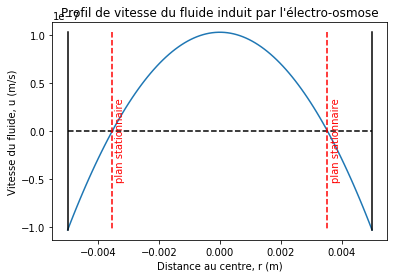

In [173]:
z=2
c=1 #mol/m3
I=0.5*(4*c+4*c)/1000
print ('La force ionique de la solution est de', I, ' M')
Ld=np.sqrt(eps*RGP*T/(2*F*F*I*1000))
print ('La longueur de Debye est de {0:.3e}'.format(Ld), 'm')

#Calcul de la vitesse d'électro-osmose
zeta=1.48e-3
a=5e-3
E=10/0.1 #V/m
U_EO=-(eps*zeta*E/mu)
print('La vitesse electro-osmotique est de {0:.3e} m/s'.format(U_EO))

#Calcul du profil de vitesse du fluide induit par l'éectro-osmose
def u(r):
    u=U_EO*(1-2*(1-r**2/a**2))
    return u

rstat=a/np.sqrt(2)
print ('Les plans stationnaires sont situés à r= {0:.3e} m du centre'.format(a/np.sqrt(2)))
print ('Vitesse du fluide au centre du tube       : {0:.3e} m/s'.format(u(0)))
print ('Vitesse du fluide à mi-distance           : {0:.3e} m/s'.format(u(a/2)))
print ('Vitesse du fluide aux plans stationnaires : {0:.3e} m/s'.format(u(a/np.sqrt(2))))
print ('Vitesse du fluide à la paroi              : {0:.3e} m/s'.format(u(a)))

rtab=np.linspace(-a,a,100)
plt.plot(rtab,u(rtab))
plt.plot([-a,a],[0,0], '--k')
plt.plot([-a,-a],[-U_EO,U_EO], 'k')
plt.plot([a,a],[-U_EO,U_EO], 'k')
plt.plot([-rstat,-rstat],[-U_EO,U_EO], '--r')
plt.plot([rstat,rstat],[-U_EO,U_EO], '--r')
plt.text(-rstat+0.0001,U_EO/2,'plan stationnaire',rotation=90, color='r')
plt.text(rstat+0.0001,U_EO/2,'plan stationnaire',rotation=90, color='r')
plt.title('Profil de vitesse du fluide induit par l\'électro-osmose')
plt.xlabel('Distance au centre, r (m)')
plt.ylabel('Vitesse du fluide, u (m/s)')

#Calcul de la vitesse d'electrophorese
nelec=0.001 #electron par nm3
R=1e-7 #m
Vp=4*np.pi*(R**3)/3
q=nelec*e*Vp*(1e9**3) #C
print ('Charge des particules      : {0:.3e} C'.format(q)) 
zeta=q/(4*np.pi*eps*R*(1+R/Ld))
print ('Potentiel zeta des particules      : {0:.3e} V'.format(zeta))
U_EP=(eps*zeta*E/mu)
print ('Vitesse electro-phorétique      : {0:.3e} m/s'.format(U_EP))

#Calcul de la ccc
Hamaker=1.3e-20 #J
upsilon=np.tanh(z*e*zeta/(4*kT))
ccc=3.8e-36*(upsilon**4/(Hamaker**2*z**6))
print ('Concentration critique de coagulation en sel divalent {0:.3e} mol/m3'.format(ccc))
print ('Concentration critique de coagulation en sel divalent {0:.3e} mol/L'.format(ccc/1000))

# 3-Electrophorèse continue


Une électrophorèse est réalisée au sein d’une veine liquide parallélépipédique de 30 cm de longueur (Lx), 5 cm de largeur (Ly), et 2 mm d’épaisseur (Lz),. On injecte dans la veine liquide un échantillon de largeur lc=0,5 mm contenant un mélange de deux protéines (la serum albumine bovine (SAB) et l’-lactalbumine) avec un débit Q de 0,5 l/h. En sortie de la veine liquide, on récupère l’écoulement dans une série de petits capillaires d’un diamètre de 0,06 mm. On applique, parallèlement à l’écoulement, une différence de potentiel de 24 V. 

Données :  	
Mélange de protéines		
- Force ionique du mélange 10-3 M KCl
- SAB : mobilité –15 10-9 m2.V-1.s-1, 				
- Hémoglobine : mobilité -22.10-9 m2.V-1.s-1 			
- Coefficient de diffusion des deux protéines : D=6.10-11 m2/s
- Rayon des protéines : R=4 nm
- Constante de Hamaker pour les protéines : A=5.10-20 J

Paroi de la cellule d’électrophorèse
- Charge de surface des parois de la cellule : -10 mV

1)	Déterminer l’intensité de la vitesse électrophorétique pour les deux protéines.


In [174]:
mSAB=-15e-9
mHM=-22e-9
E=24/0.05 #V/m
uSAB=mSAB*E
uHM=mHM*E
print ('Vitesse SAB     : {0:.3e} m/s'.format(uSAB)) 
print ('Vitesse HM     : {0:.3e} m/s'.format(uHM)) 

Vitesse SAB     : -7.200e-06 m/s
Vitesse HM     : -1.056e-05 m/s


2)	Cette vitesse dans la direction y se combine à l ‘écoulement du liquide suivant x. Déterminer la distance, Y, qui est parcourue suivant y en sortie de la veine liquide par les deux protéines et en déduire la distance séparant les deux protéines en sortie, $\Delta Y$.

>Le temps de séjour des protéines dans la cellule est le rapport du volume de la cellule sur le débit volumique. La déviation de la trajectoire des protéines sera alors donné par le produit de la vitesse selon Y par le temps de séjour. 
$$Y_x=u_x*t_s$$
$$\Delta Y=\lvert Y_{SAB}-Y_{HM} \rvert$$

In [175]:
Q=0.5 #L/h
V=0.3*0.05*2e-3 #m3
t_s=V/(Q*0.001/3600)
print ('Temps de sejour ',t_s, ' s')
DY=(uSAB-uHM)*t_s
print ('Difference de déviation ',DY, ' m')

Temps de sejour  216.00000000000003  s
Difference de déviation  0.0007257599999999999  m


3)	En considérant les espèces séparées si Y en sortie de veine liquide est supérieur au diamètre des capillaires, la séparation des deux espèces a-t-elle lieue ?

> Oui car la différence de déviation est bien plus grande que la taille des capillaires recupérant la veine liquide en sortie




4)	Calculer la vitesse électro-osmotique, uEO, due à la charge de surface de la paroi de la veine liquide.

In [179]:
zeta_w=-0.01
U_EO=-(eps*zeta_w*E/mu)
print('La vitesse electro-osmotique est de {0:.3e} m/s'.format(U_EO))

La vitesse electro-osmotique est de 3.336e-06 m/s
